### Train a logical xor funciton using a neural network

In [ ]:
from tidygrad.tensor import Tensor
from tidygrad.func import sigmoid
import matplotlib.pyplot as plt
import numpy as np
from fastcore.test import test_eq

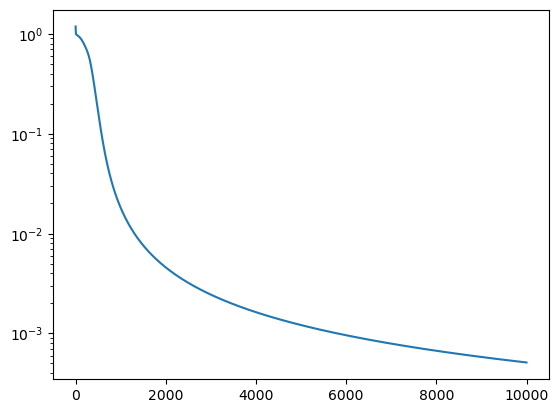

In [ ]:
# Train an XOR network
X = [
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
]


Y = [0, 1, 1, 0]


# np.random.seed(1337)

w1 = Tensor(np.random.randn(2, 6), "w1", requires_grad=True)
b1 = Tensor(np.zeros((1, 6)), "b1", requires_grad=True)

w2 = Tensor(np.random.randn(6, 1), "w2", requires_grad=True)

LR = 0.3

losses = []


def NN(inputs, params):
    x, y = inputs
    w1, b1, w2 = params
    z1 = sigmoid(x.mmul(w1)+b1, "z1")
    preds = sigmoid(z1.mmul(w2, "z2"), "preds")

    diff = preds.sub(y, "diff")

    l = diff.mul(diff, "l")
    loss = l.sum("loss")

    return loss


for i in range(10000):
    x = Tensor(np.array(X, dtype=float), "x")
    y = Tensor(np.array(Y, dtype=float)[:, None], "y")

    loss = NN((x, y), (w1, b1, w2))

    loss.backward()

    w1.data -= LR * w1.grad
    b1.data -= LR * b1.grad
    w2.data -= LR * w2.grad

    w1.grad = np.zeros_like(w1.grad)
    b1.grad = np.zeros_like(b1.grad)
    w2.grad = np.zeros_like(w2.grad)

    losses.append(loss.data)

plt.plot(losses)
plt.yscale("log")

In [ ]:
test_eq(loss.data < 0.01, True)